In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Simhei']  #显示中文
plt.rcParams['axes.unicode_minus']=False    #显示负号  
my_time_dict = {'s': (1,'$\\mathrm{s}$'), # use to select time unit
           'ms': (1e3,'$\\mathrm{ms}$'),
           'us':(1e6,'$\\mathrm{\\mu s}$') ,
           'ns':(1e9,'$\\mathrm{ns}$')}
my_volt_dict = {'V': (1,'$\\mathrm{V}$'), # use to select volt unit
           'mV': (1e3,'$\\mathrm{mV}$'),
           'uV':(1e6,'$\\mathrm{\\mu V}$') ,
           'nV':(1e9,'$\\mathrm{nV}$')}
import os
path='../figs/'
os.makedirs(path,exist_ok=True)

In [2]:
current_directory = os.getcwd()
print(f"you are now at {current_directory}")
files = os.listdir(current_directory)
print('There are following .CSV files in you current directory:')
# for file in files:
#     print(f'    {file}')
csvfiles = []
for file in files:
    _,extension= os.path.splitext(file)
    if extension=='.CSV':
        csvfiles.append(file)
display(csvfiles)

you are now at d:\核相关基础实验II\Experiment-2\wavedata
There are following .CSV files in you current directory:


['TEK0000.CSV',
 'TEK0001.CSV',
 'TEK0002.CSV',
 'TEK0003.CSV',
 'TEK0004.CSV',
 'TEK0005.CSV',
 'TEK0006.CSV',
 'TEK0007.CSV',
 'TEK0008.CSV']

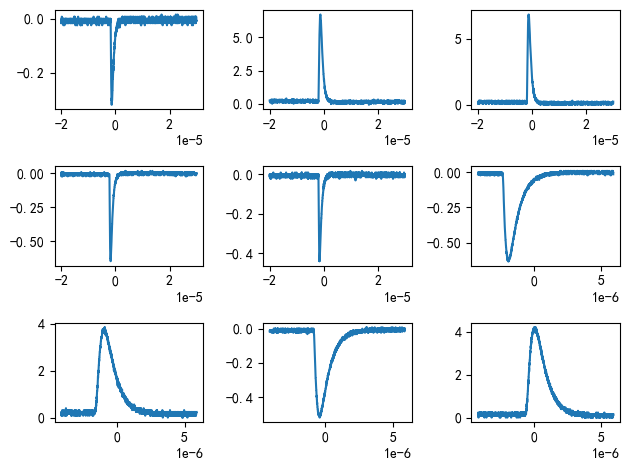

In [3]:
i = 0
figs_per_line = 3
total_fig,total_axs = plt.subplots(figs_per_line,
                       len(csvfiles)//figs_per_line+int(bool(len(csvfiles)%figs_per_line)))
for file in csvfiles:
    data = pd.read_csv(file,header=None)
    total_axs[i//3,i%3].plot(data[3].values,data[4].values)
    i += 1
plt.tight_layout()  # 调整子图之间的间距
plt.show()

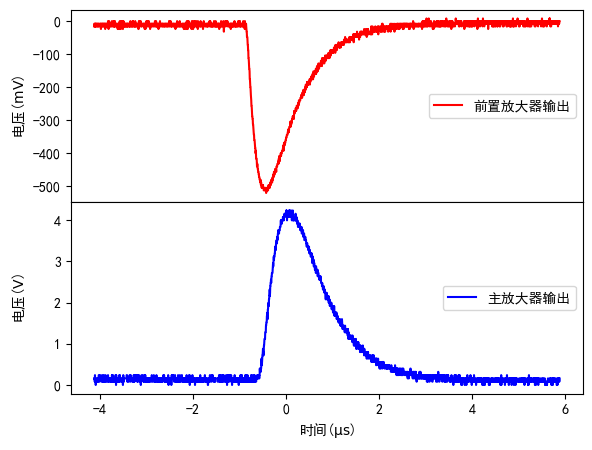

In [4]:
time_unit = 'us'
volt_unit0 = 'mV'
volt_unit1 = 'V'

fig,axs = plt.subplots(2)
time1,volt1 = total_axs[2][1].lines[0].get_data()
time1=time1*my_time_dict[time_unit][0]
volt1=volt1*my_volt_dict[volt_unit0][0]
axs[0].plot(time1,volt1,'r',label='前置放大器输出')
axs[0].set_ylabel(f'电压({my_volt_dict[volt_unit0][1]})')

time2,volt2 = total_axs[2][2].lines[0].get_data()
time2=time2*my_time_dict[time_unit][0]
volt2=volt2*my_volt_dict[volt_unit1][0]
axs[1].plot(time2,volt2,'b',label='主放大器输出')
axs[1].set_ylabel(f'电压({my_volt_dict[volt_unit1][1]})')
axs[1].set_xlabel(f'时间({my_time_dict[time_unit][1]})')
fig.align_labels() # 标签对齐

axs[0].legend(loc = 'right')
axs[1].legend(loc = 'right')
# fig.legend()
# fig.tight_layout()
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, hspace=0)

fig.savefig(path+'waveform.pdf',bbox_inches='tight')